In [2]:
import patoolib # to extract the files
import pandas as pd # for data analysis and manipulation
import numpy as np # for scientific computing
import plotly.express as px # for visualization

In [24]:
# .rar extraction

patoolib.extract_archive("raw/cancellation_prediction.rar", outdir="raw/")

patool: Extracting raw/cancellation_prediction.rar ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -oraw/ -- raw/cancellation_prediction.rar


In [27]:
df = pd.read_csv("raw/cancellation_prediction.csv")

In [28]:
df.iloc[0]

type                               Fancy Hotel
cancellation                                 0
days_between_booking_arrival               342
year_arrival_date                         2015
month_arrival_date                        July
week_number_arrival_date                    27
day_of_month_arrival_date                    1
num_weekend_nights                           0
num_workweek_nights                          0
num_adults                                   2
num_children                               0.0
num_babies                                   0
breakfast                                 True
country                                    PRT
market_segment                               0
distribution_channel                         0
repeated_guest                               0
num_previous_cancellations                   0
num_previous_stays                           0
reserved_room                                C
changes_between_booking_arrival              3
deposit_polic

In [31]:
months_dict = dict((v,k) for k,v in zip(range(1, 13), df["month_arrival_date"].unique()))
df['month_arrival_date'] = df['month_arrival_date'].map(months_dict)

df["breakfast"] = df["breakfast"]*1

rooms_dict = dict((v,k) for k,v in zip(range(len(df["reserved_room"].unique())), np.sort(df["reserved_room"].unique())))
df['reserved_room'] = df['reserved_room'].map(rooms_dict)

type_dict = {"Fancy Hotel":1, "Hotel":0}
df['type'] = df['type'].map(type_dict)

In [30]:
df["deposit_policy"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [74]:
(len(df[(df["deposit_policy"] == "Refundable") & (df["cancellation"] == 1)]) / len(df[df["deposit_policy"] == "Refundable"])), len(df[df["deposit_policy"] == "Refundable"])/len(df)

(0.2222222222222222, 0.0013568975626099338)

In [73]:
len(df[(df["deposit_policy"] == "Non Refund") & (df["cancellation"] == 1)]) / len(df[df["deposit_policy"] == "Non Refund"]), len(df[df["deposit_policy"] == "Non Refund"])/len(df)

(0.9936244601357374, 0.1221794120110562)

In [75]:
(len(df[(df["deposit_policy"] == "No Deposit") & (df["cancellation"] == 1)]) / len(df[df["deposit_policy"] == "No Deposit"])), len(df[df["deposit_policy"] == "No Deposit"])/len(df)

(0.28377022390841067, 0.8764636904263339)

In [33]:
df.iloc[200]

type                                        1
cancellation                                0
days_between_booking_arrival                0
year_arrival_date                        2015
month_arrival_date                          1
week_number_arrival_date                   28
day_of_month_arrival_date                   7
num_weekend_nights                          0
num_workweek_nights                         1
num_adults                                  1
num_children                              0.0
num_babies                                  0
breakfast                                   1
country                                   GBR
market_segment                              2
distribution_channel                        2
repeated_guest                              0
num_previous_cancellations                  0
num_previous_stays                          0
reserved_room                               0
changes_between_booking_arrival             0
deposit_policy                    

In [34]:
nan_df = pd.DataFrame()
values = []


for column in df.columns:
    nan_df[column] = [round(len(df[column].dropna())/len(df),2)]

nan_df = nan_df.T
    
fig = px.bar(nan_df, x=nan_df.index, y=0)
fig.show()

In [36]:
df = df.drop("id_person_booking", axis=1) # This columns only has 6% of the values filled

In [37]:
df.iloc[100000]

type                                        0
cancellation                                0
days_between_booking_arrival              182
year_arrival_date                        2016
month_arrival_date                          4
week_number_arrival_date                   43
day_of_month_arrival_date                  16
num_weekend_nights                          2
num_workweek_nights                         3
num_adults                                  2
num_children                              0.0
num_babies                                  0
breakfast                                   1
country                                   DEU
market_segment                              2
distribution_channel                        2
repeated_guest                              0
num_previous_cancellations                  0
num_previous_stays                          0
reserved_room                               0
changes_between_booking_arrival             0
deposit_policy                    

In [38]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('int32'), dtype('O')],
      dtype=object)

In [39]:
numeric_columns = df.select_dtypes(include=["int64", "int32", "float64"])
non_numeric_columns = df.select_dtypes(include=["O"])

len(df.columns) == len(numeric_columns.columns) + len(non_numeric_columns.columns)

True

In [40]:
# Tendency
mean = pd.DataFrame(numeric_columns.mean()).round(2).T
median = pd.DataFrame(numeric_columns.median()).round(2).T

# Dispersion
std = pd.DataFrame(numeric_columns.std()).round(2).T
v_max = pd.DataFrame(numeric_columns.max()).round(2).T
v_min = pd.DataFrame(numeric_columns.min()).round(2).T

x = lambda x: x.max() - x.min()
v_range = pd.DataFrame(numeric_columns.apply(x)).T

x = lambda x: x.skew().round(2)
skew = pd.DataFrame(numeric_columns.apply(x)).T

x = lambda x: x.kurt().round(2)
kurt = pd.DataFrame(numeric_columns.apply(x)).T

data_description = pd.concat([mean, median, std, v_max, v_min, v_range, skew, kurt]).T.reset_index()
data_description.columns = ["column", "mean", "median", "std", "max", "min", "range", "skew", "kurt"]
data_description

,column,mean,median,std,max,min,range,skew,kurt
0,type,0.34,0.00,0.47,1.0,0.0,1.0,0.70,-1.51
1,cancellation,0.37,0.00,0.48,1.0,0.0,1.0,0.54,-1.71
2,days_between_booking_arrival,104.01,69.00,106.86,737.0,0.0,737.0,1.35,1.70
3,year_arrival_date,2016.16,2016.00,0.71,2017.0,2015.0,2.0,-0.23,-0.99
4,month_arrival_date,6.34,6.00,3.73,12.0,1.0,11.0,0.05,-1.44
5,week_number_arrival_date,27.17,28.00,13.61,53.0,1.0,52.0,-0.01,-0.99
6,day_of_month_arrival_date,15.80,16.00,8.78,31.0,1.0,30.0,-0.00,-1.19
7,num_weekend_nights,0.93,1.00,1.00,19.0,0.0,19.0,1.38,7.17
8,num_workweek_nights,2.50,2.00,1.91,50.0,0.0,50.0,2.86,24.28
9,num_adults,1.86,2.00,0.58,55.0,0.0,55.0,18.32,1352.12


In [60]:
data_description[(data_description["kurt"] > 3) | (data_description["kurt"] < -3)]

,column,mean,median,std,max,min,range,skew,kurt
7,num_weekend_nights,0.93,1.0,1.00,19.0,0.0,19.0,1.38,7.17
8,num_workweek_nights,2.50,2.0,1.91,50.0,0.0,50.0,2.86,24.28
9,num_adults,1.86,2.0,0.58,55.0,0.0,55.0,18.32,1352.12
10,num_children,0.10,0.0,0.40,10.0,0.0,10.0,4.11,18.67
11,num_babies,0.01,0.0,0.10,10.0,0.0,10.0,24.65,1633.95
15,repeated_guest,0.03,0.0,0.18,1.0,0.0,1.0,5.33,26.37
16,num_previous_cancellations,0.09,0.0,0.84,26.0,0.0,26.0,24.46,674.07
17,num_previous_stays,0.14,0.0,1.50,72.0,0.0,72.0,23.54,767.25
19,changes_between_booking_arrival,0.22,0.0,0.65,21.0,0.0,21.0,6.00,79.39
23,required_car_parking_spaces,0.06,0.0,0.25,8.0,0.0,8.0,4.16,30.00


# Skew and Kurt (Outliers?)

- num_weekend_nights
- num_workweek_nights
- num_adults
- num_children
- num_babies
- num_previous_cancellations
- num_previous_stays
- changes_between_booking_arrival
- required_car_parking_spaces

In [79]:
df[df["year_arrival_date"] == 2016]["cancellation"].sum()

20337

In [105]:
df[(df["year_arrival_date"] == 2017) & (df["month_arrival_date"] == 2) & (df["day_of_month_arrival_date"] == 31)] 
# When trying to create a time series for daily cancellations, found that there are cancellations on february days that dont exist.
# date 31 in months that end in 30

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,...,num_previous_cancellations,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
13789,1,1,24,2017,2,35,31,0,1,1,...,0,0,0,0,No Deposit,NaN,2,177.50,0,1
13790,1,1,95,2017,2,35,31,0,2,2,...,0,0,6,0,No Deposit,241.0,0,290.00,0,2
13791,1,1,45,2017,2,35,31,0,1,2,...,0,0,0,0,No Deposit,250.0,0,185.00,0,0
13792,1,1,24,2017,2,35,31,0,1,2,...,0,0,0,0,No Deposit,NaN,2,202.00,0,4
13793,1,1,17,2017,2,35,31,0,3,2,...,0,0,0,0,No Deposit,240.0,0,207.00,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119381,0,0,188,2017,2,35,31,2,3,2,...,0,0,0,0,No Deposit,14.0,0,99.00,0,0
119383,0,0,164,2017,2,35,31,2,4,2,...,0,0,0,0,No Deposit,42.0,0,87.60,0,0
119386,0,0,102,2017,2,35,31,2,5,3,...,0,0,4,0,No Deposit,9.0,0,225.43,0,2
119387,0,0,34,2017,2,35,31,2,5,2,...,0,0,3,0,No Deposit,9.0,0,157.71,0,4


In [106]:
ts_df = pd.DataFrame()
index = list()
n_cancellations = list()

for year in np.sort(df["year_arrival_date"].unique()):
    for month in np.sort(df["month_arrival_date"].unique()):
        index.append(str(year)+"-"+str(month))
        n_cancellations.append(df[(df["year_arrival_date"] == year) & (df["month_arrival_date"] == month)]["cancellation"].sum())

ts_df.index = index
ts_df["cancellations"] = n_cancellations
ts_df.index = pd.to_datetime(ts_df.index)

<AxesSubplot:>

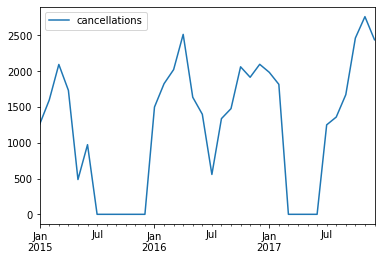

In [107]:
ts_df.plot()
# correlacao entre cancelamentos e numero de reservas

In [ ]:
# CHURN

# hipotese para item c):
# 1. A separação temporal implica que os padrões observados em determinado ano(s) sem repetiram nos próximos anos.
# 2. A separação aleatoria dá margem para que o modelo não overfite os padrões de determinados anos, se "preparando" para uma aleatoriedade futura.
# 3. Verificar resultados para certeza.
# 4. 2016 tem mais registros, combinar 2016 e outros?

# obs:
# 1. Quais dados estão disponíveis no momento da realização da reserva? (entendimento de negócio)
# 2. Bar plot das colunas com dropna()
# 3. Se der, agendar notebook no deepnote, simulando entrada de dados